#  Analyze Sort-seq
Sort-seq library question 4 and 5: what affect does orientatin and spacing of half sites have on expression?

This module analyzes sort-seq data and made Figure 6A and 6B in Recio et al., 

Code written by PSR

In [1]:
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy 
import itertools
import seaborn as sns
import statannotations
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statannotations.Annotator import Annotator
from scipy import stats
from analyze_sig_hits_v2 import *
from analyze_sort_seq import *
from bioinfokit.analys import stat

In [2]:
def make_sns_boxplot(df, xvalue, yvalue, color, color2, hue_value, output_file, xl, yl, wt_prmean, output, n):
    """This function makes a boxplot for sequence orientation"""
    ax = sns.barplot(x=xvalue, y=yvalue, data=df, hue = hue_value, palette= color)
    #plt.axhline(y = wt_prmean , color = color2, linestyle = ':')
    #plt.annotate("Average consensus sequence mean", size = 8, xy = (0, wt_prmean-n))
    yt = ["WT", "Forward", "Reverse", "Consensus", "Opposite"]
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    #ax.set_xticklabels(yt)
    #plt.show()
    plt.savefig(output, bbox_inches='tight')

In [3]:
 def make_df(df, pr_name, mut_type):
    "This function makes a df of orientation mutations"
    pr_q3 = df.loc[(df["Promoter"]== pr_name) & (df["Sequence_type"].str.contains(mut_type)) & (~df["Sequence_type"].str.contains("space_orientation"))]
    return pr_q3


In [4]:
def wt_values(df, pr_name):
    """This function makes a df of WT promoter sequences"""
    means = []
    wt_pr_df = []
    for i in pr_name:
        wt_pr = df.loc[(df["Sequence_type"].str.contains("WT"))& (df["Promoter"].str.contains(i)) & (~df["Promoter"].str.contains("mut"))]
        means.append(wt_pr["Expression"].mean())
        wt_pr_df.append(wt_pr)


    return means, wt_pr_df

In [47]:
expression_file = "L4_gal4_anova_analysis.csv"
expression_ko_file = "L4_gal4KO_anova_analysis.csv"


expression_file2 = "L4_leu3_anova.csv"
expression_file3 = "L4_tea1_anova.csv"
expression_file4 = "L4_yrm1_final.csv"

filter1 = "control"
filter2 = "Mpr20"

df = pd.read_csv(expression_file4, header= None)
#df_ko = pd.read_csv(expression_ko_file, header= None)
df = df.loc[(~df[1].str.contains(filter1))& (~df[1].str.contains(filter2))]
# #df_ko = df_ko.loc[(~df_ko[1].str.contains("GID8"))& (~df_ko[1].str.contains("GAL2"))& (~df_ko[1].str.contains("GAL7"))]
df.columns = ['Sequence_type', 'Promoter', 'insert', 'Expression']
#df_ko.columns = ['Sequence_type', 'Promoter', 'insert', 'Expression']

In [48]:
df

,Sequence_type,Promoter,insert,Expression
1,WT,YRM1_Mnn4pr,11,5403.561
2,WT,YRM1_Tpo4/Mod5pr,14,2802.121
11,mutCGG1,YRM1_Mnn4pr,0,2535.298
12,mutCGG2,YRM1_Mnn4pr,0,1727.673
13,ranmut1,YRM1_Mnn4pr,9,2914.318
...,...,...,...,...
1571,space_mutation,YRM1_Tpo4/Mod5pr,8,1754.769
1575,space_mutation,YRM1_Mnn4pr,6,2710.307
1576,space_mutation,YRM1_Tpo4/Mod5pr,8,1854.023
1580,space_mutation,YRM1_Mnn4pr,6,2157.384


In [58]:
all_df2 = df.loc[(df["Sequence_type"].str.contains("orientation")) & (~df["Sequence_type"].str.contains("spa"))]
#all_df2_ko = df_ko.loc[(df_ko["Sequence_type"].str.contains("orientation")) & (~df_ko["Sequence_type"].str.contains("spa"))]


all_space = df.loc[(df["Sequence_type"].str.contains("space")) & (~df["Sequence_type"].str.contains("space_orientation"))]
#all_space_ko = df_ko.loc[(df_ko["Sequence_type"].str.contains("space")) & (~df_ko["Sequence_type"].str.contains("space_orientation"))]






In [60]:
all_df2

,Sequence_type,Promoter,insert,Expression
334,orientationF,YRM1_Mnn4pr,11,6159.856
335,orientationR,YRM1_Mnn4pr,11,6052.464
336,orientationF,YRM1_Tpo4/Mod5pr,14,3477.306
337,orientationR,YRM1_Tpo4/Mod5pr,14,5522.919
338,orientationF,YRM1_control_Hsv2pr,5,1001.648
339,orientationR,YRM1_control_Hsv2pr,5,1547.638
340,orientationF,YRM1_control_Cax4pr,12,3341.170
341,orientationR,YRM1_control_Cax4pr,12,5411.289
343,orientationfacesame,YRM1_Mnn4pr,10,3694.771
344,orientationfacesame,YRM1_Tpo4/Mod5pr,14,4646.880


In [150]:
#pr_names = ["ADR1pr_reg1", "HAP4pr_reg1", "STP4pr_reg1"]
filter_out2 = "control"
wt_halfsitepr= df.loc[(df['Sequence_type']== "WT") & ~df['Promoter'].str.contains(filter_out2) & ~df['Promoter'].str.contains("GAL1")]
pr_names = wt_halfsitepr["Promoter"].tolist()
pr_names = list(set(pr_names))

In [79]:
def make_df_for_all(df, pr_list):
    list_df = []
    for i in pr_list: 
        a = make_df(df, i, "space")
        list_df.append(a)
    return list_df


In [52]:
all_df  = make_df_for_all(all_df2, pr_names)
#all_dfko  = make_df_for_all(df_ko, pr_names)

In [53]:
all_df2 = all_df2[~all_df2["Promoter"].str.contains('control')]
all_df3 = pd.concat([wt_halfsitepr, all_df2])

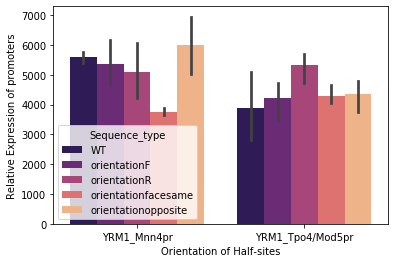

In [54]:
make_sns_boxplot(all_df3, "Promoter", "Expression", "magma", "blue", "Sequence_type", "b", "Orientation of Half-sites","Relative Expression of promoters", "b", "q4_allpr_yrm1.pdf", "n")



In [239]:
all_df2["difference"] = all_df2["Expression"] - all_df2_ko["Expression"]

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


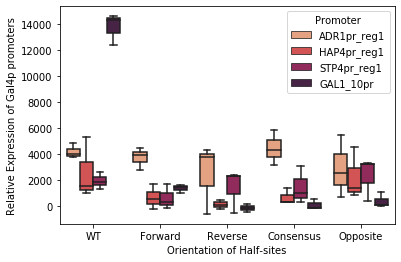

In [249]:
make_sns_boxplot(all3, "Sequence_type", "difference_2", "rocket_r", "blue", "Promoter", "b", "Orientation of Half-sites","Relative Expression of Gal4p promoters", "b", "q4_allpr_difference.pdf", 5)



In [26]:
wt_means, wt_dfs = wt_values(df, pr_names)
#wt_means_ko, wt_dfs_ko = wt_values(df_ko, pr_names)

In [27]:
all_d = pd.concat(wt_dfs)
#all_d_ko = pd.concat(wt_dfs_ko)

In [28]:
all3 = pd.concat([all_d, all_df2])
#all3_ko = pd.concat([all_d_ko, all_df2_ko])

In [247]:
all3["difference_2"] = all3["Expression"] - all3_ko["Expression"]

In [109]:
df

,Sequence_type,Promoter,insert,Expression
0,WT,TEA1_Vma13pr,17,5854
1,WT,TEA1_Rg12/Vhr1pr,13,4201
2,WT,TEA1_Gln1pr,9,2425
3,WT,TEA1_control_Isf1pr,4,2817
4,WT,TEA1_control_Adh3pr,4,2513
...,...,...,...,...
1357,site_mutation_CG_maintain,TEA1_Gln1pr,5,2832
1358,site_mutation_CG_maintain,TEA1_Gln1pr,6,2464
1359,site_mutation_CG_maintain,TEA1_Gln1pr,7,3472
1360,site_mutation_CG_maintain,TEA1_Gln1pr,8,2616


In [151]:
space = make_df_for_all(df ,pr_names)

In [152]:
bp_space = [2,4,6,8,10] * 3

In [153]:
for i in space:
    #print(i["space"])
    i["space"] = bp_space

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [155]:
space[2]

,Sequence_type,Promoter,insert,Expression,space
546,space_mutation,HAP4pr_reg1,9,3695.205106,2
551,space_mutation,HAP4pr_reg1,9,5920.521168,4
556,space_mutation,HAP4pr_reg1,8,2834.836485,6
561,space_mutation,HAP4pr_reg1,7,1699.269881,8
566,space_mutation,HAP4pr_reg1,6,3205.005506,10
1116,space_mutation,HAP4pr_reg1,9,5006.808025,2
1121,space_mutation,HAP4pr_reg1,9,4112.004640,4
1126,space_mutation,HAP4pr_reg1,8,2744.582066,6
1131,space_mutation,HAP4pr_reg1,7,1196.360719,8
1136,space_mutation,HAP4pr_reg1,6,2897.286319,10


In [156]:
all_space = pd.concat(space)

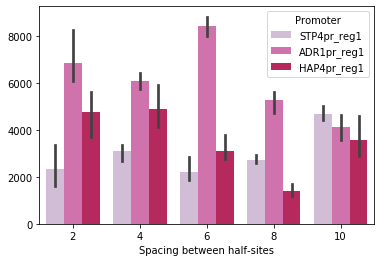

In [157]:
make_sns_boxplot(all_space, "space", "Expression", "PuRd", "blue", "Promoter", "b", "Spacing between half-sites","", "b", "q4_allpr_space_gal.pdf", 5)



In [194]:
all_space2

,Sequence_type,Promoter,insert,Expression
0,WT,ADR1pr_reg1,15,8721.071522
570,WT,ADR1pr_reg1,15,7614.706826
1140,WT,ADR1pr_reg1,15,7979.507880
1,WT,HAP4pr_reg1,11,7831.710691
571,WT,HAP4pr_reg1,11,4952.743084
...,...,...,...,...
1704,space_mutation,GAL1_10pr,5,4201.019051
1705,space_mutation,ADR1pr_reg1,9,4095.898372
1706,space_mutation,HAP4pr_reg1,6,4577.902737
1707,space_mutation,STP4pr_reg1,7,4582.221596


In [198]:
all_d

,Sequence_type,Promoter,insert,Expression
0,WT,ADR1pr_reg1,15,8721.071522
570,WT,ADR1pr_reg1,15,7614.706826
1140,WT,ADR1pr_reg1,15,7979.507880
1,WT,HAP4pr_reg1,11,7831.710691
571,WT,HAP4pr_reg1,11,4952.743084
1141,WT,HAP4pr_reg1,11,5127.792100
2,WT,STP4pr_reg1,10,4239.085211
572,WT,STP4pr_reg1,10,5255.418562
1142,WT,STP4pr_reg1,10,4885.289923
4,WT,GAL1_10pr,8,16441.696230


In [199]:
all_space

,Sequence_type,Promoter,insert,Expression
545,space_mutation,ADR1pr_reg1,12,6072.097586
546,space_mutation,HAP4pr_reg1,9,3695.205106
547,space_mutation,STP4pr_reg1,8,3363.765605
549,space_mutation,GAL1_10pr,7,3858.547228
550,space_mutation,ADR1pr_reg1,10,6147.544506
551,space_mutation,HAP4pr_reg1,9,5920.521168
552,space_mutation,STP4pr_reg1,7,3371.518556
554,space_mutation,GAL1_10pr,7,2775.952920
555,space_mutation,ADR1pr_reg1,10,8806.802620
556,space_mutation,HAP4pr_reg1,8,2834.836485


In [207]:
total_space = ([2] * 4) + ([4] *4) + ([6] * 4)+ ([8] * 4)+ ([10] * 4)

In [209]:
total = total_space * 3

In [211]:
all_space["space"] = total

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [212]:
total_wt = [0] * 12

In [213]:
all_d["space"] = total_wt

In [216]:
wt_half_all_space = pd.concat([all_d, all_space])

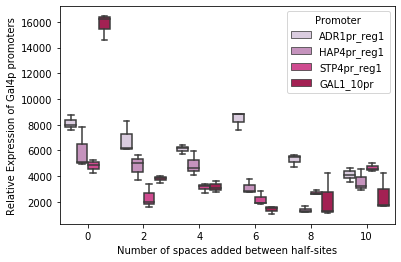

In [253]:
make_sns_boxplot(wt_half_all_space, "space", "Expression", "PuRd", "blue", "Promoter", "b", "Number of spaces added between half-sites","Relative Expression of Gal4p promoters", "b", "q4_allpr_space_box.pdf", 5)



In [255]:
wt_half_all_space

,Sequence_type,Promoter,insert,Expression,space
0,WT,ADR1pr_reg1,15,8721.071522,0
570,WT,ADR1pr_reg1,15,7614.706826,0
1140,WT,ADR1pr_reg1,15,7979.507880,0
1,WT,HAP4pr_reg1,11,7831.710691,0
571,WT,HAP4pr_reg1,11,4952.743084,0
...,...,...,...,...,...
1704,space_mutation,GAL1_10pr,5,4201.019051,8
1705,space_mutation,ADR1pr_reg1,9,4095.898372,10
1706,space_mutation,HAP4pr_reg1,6,4577.902737,10
1707,space_mutation,STP4pr_reg1,7,4582.221596,10


In [257]:
all_space_ko["space"] = total

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [260]:
all_d_ko["space"] = total_wt

In [261]:
total_ko = pd.concat([all_d_ko, all_space_ko])

In [264]:
wt_half_all_space["difference"] = wt_half_all_space["Expression"] - total_ko["Expression"]

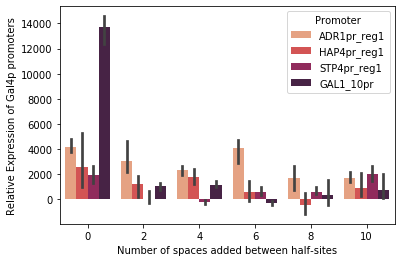

In [267]:
make_sns_boxplot(wt_half_all_space, "space", "difference", "rocket_r", "blue", "Promoter", "b", "Number of spaces added between half-sites","Relative Expression of Gal4p promoters", "b", "q4_allpr_space_bar_difference.pdf", 5)



In [11]:
df

,0,1,2,3
0,WT,LEU3_Ipt1/Snf11pr,9,3023.256255
1,WT,LEU3_Mdh2pr,13,5296.676469
2,WT,LEU3_Sod1/Ado1pr,8,4768.004122
7,mutCGG1,LEU3_Ipt1/Snf11pr,0,2019.057708
8,mutCGG2,LEU3_Ipt1/Snf11pr,0,2115.312504
...,...,...,...,...
1344,space_mutation,LEU3_Mdh2pr,8,2718.149211
1345,space_mutation,LEU3_Sod1/Ado1pr,6,2419.618057
1348,space_mutation,LEU3_Ipt1/Snf11pr,6,2071.100246
1349,space_mutation,LEU3_Mdh2pr,7,2610.855061


In [49]:
space_orientation = df.loc[(df["Sequence_type"].str.contains("space_orientation")) | (df["Sequence_type"]== "WT") & (~df["Sequence_type"].str.contains("mut"))]

space_orientation

,Sequence_type,Promoter,insert,Expression
1,WT,YRM1_Mnn4pr,11,5403.561
2,WT,YRM1_Tpo4/Mod5pr,14,2802.121
479,space_orientation,YRM1_Mnn4pr,10,3056.808
480,space_orientation,YRM1_Tpo4/Mod5pr,13,3652.364
484,space_orientation,YRM1_Mnn4pr,10,3415.578
485,space_orientation,YRM1_Tpo4/Mod5pr,13,4111.411
489,space_orientation,YRM1_Mnn4pr,10,3603.542
490,space_orientation,YRM1_Tpo4/Mod5pr,13,3876.176
494,space_orientation,YRM1_Mnn4pr,10,3876.153
495,space_orientation,YRM1_Tpo4/Mod5pr,13,3471.694


In [50]:
total_space2 = (([0] * 2) +([2] * 2) + ([4] *2) + ([6] * 2)+ ([8] * 2)+ ([10] * 2)) *3 

In [51]:
space_orientation["space"] = total_space2

/Users/pamelarecio/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
len(total_space2)

36

In [53]:
m = space_orientation["insert"].tolist()
len(m)

36

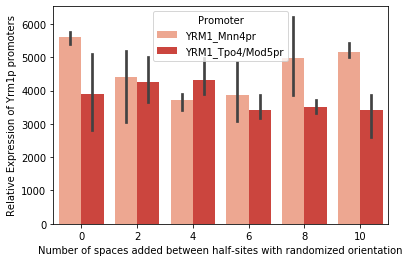

In [54]:
make_sns_boxplot(space_orientation, "space", "Expression", "Reds", "PuRd", "Promoter", "b", "Number of spaces added between half-sites with randomized orientation","Relative Expression of Yrm1p promoters", "b", "q4_Yrm1_allpr_space_randomized.pdf", 5)

